<b> Made By: Kunal Anand</b>

<b>Email: kunalanand2907@gmail.com</b>

<b>Contact Number:: +91 7042939501</b>


## Predict Time Taken By Delivery Person(ETA--Estimated Time of Arrival)

<B>Task: Devolop a Machine Learning Model that can calculate the time taken by the delivery person to deliver the order , given relevant information</B>

<B>Dataset Description:
    
    1.) Train : contains 45593 .txt files
    
    2.) Test : contains 11399 .txt files
    
    3.) Sample Submission.csv: 5x2</B>
        

## Workflow Of The Machine Learning Model

<B>I have created 2 Files:
    
    1.) Data Preprocessing & EDA
   
    2.) Model Building & Train_Predict the Time Taken (Min)</B>

## Table Of Contents:
  <h3>1. Data Preprocessing</h3>
    <ul>
    <li>Data Preparation --Combination of 45593 & 11339 .txt files into Train.csv & Test.csv</li>
    <li>Importing Libraries & Train & Test Dataset</li>
    <li>Finding Missing(Nan) Values and filling it with Mean-- Numerical Data & Mode--Categorical Data</li>
    <li>Dropping Redundant & not imp Attributed: 1. ID, 2. Delivery_person_ID 3. Order_Date 4. Time_Orderd 5. Time_Order_picked</li>
  <li>Encoding the Categorical Columns: 1. Binary Classes: label Encoding 2.Multi Classes: One Hot Encoding(Dummy Variables)</li>
  <li>Feature Selection: Selecting the best features having the most information and reducing the dimenionality of Dataset</li>
  <li>Feature Scaling: Scaling the Attributes by Standard Scaler or Min- Max Scaler for mean=0 and Standard Deviation=1</li>
  </ul>
  <h3>2. Data Vizualization(EDA) - Graphs & Charts to understand the relationship between the Colums of Dataset</h3>
  <h3>3. Machine Learning Algorithm Selection</h3>
  <ul>
  <li>Supervised ML - Multiple Regression, Decision Trees, Support Vector Machines, Random Forest Regressor</li>
  <li>Deep Learning: ANN(Artificial Neural Network)</li>
   </ul>
   <h3>4. Model Building, Evaluation & Prediction</h3>
   <li>Building Different type of Regressors Object: Linear RegressionSVM, Random Forest, Decision Trees, Bagged Decision Tree,XG Boost,Stacked Random Forest & XG Boost</li>
   <li>Fitting on X_train & Y_train Data & Then Predicting on X_test</li>
   <h3>5. Model Tuning with Hyper Parameters & Improving R2 Score</h3>
   <li>Using Grid Search Cv & Randomized Cv for selecting Best Parameters</li>
   <li>Using K - Cross Validation to internally make Batches of Dataset so as to increase the R2 score & Reduce Overfitting</li>
   <li>Regularization: Ridge regression( For reducing Overfitting & Make slope less steap</li>
   <li>Lasso Regression: To reduce Overfitting, Feature Selection & Make slope value =~0</li>
   <h3>6. Compairing Results of all Machine Learning Model</h3>
   <h3>7. Best Model and output the Results to Submission.csv File</h3>
   <ul>
   <li>By Stacked RF & XG Boost Regressor: 75.615</li>
   </ul>
   

    
    


### 1.) Data Preprocessing

<B>Data Preparation -- Combination of 45593 & 11339 .txt files into Train.csv & Test.csv </B>

<B>Train.csv</B>

In [1]:
# Importing Csv
import csv
# Creating a file Train.csv and writing the column Names
with open("Train.csv",mode='a+', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["ID","Delivery_person_ID","Delivery_person_Age","Delivery_person_Ratings","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Time_Orderd","Time_Order_picked","Weather conditions","Road_traffic_density","Vehicle_condition","Type_of_order","Type_of_vehicle","multiple_deliveries","Festival","City","Time_taken (min)"])

In [2]:
# Importing Libraries re -- Regex and Glob -- to return all file paths that match specific pattern
import re
import glob
# Opening the New Train.csv file & append the data to it
with open('Train.csv','a+') as csv_file:
    # Will iterate .txt files one by one
    for path in glob.glob('dataset/train/*.txt'):
        with open(path,'r') as f:
            # Reading the whole file as a string
            lines=f.read()
            # Replacing the Space with _ for Column names
            lines=lines.replace('Weather conditions','Weather_conditions')
            lines=lines.replace('Time_taken (min)','Time_taken_(min)')
            # Applying Commas where there the string matches with space
            lines=re.sub('\s+',',',lines)
            # Splitting on commas and forming a lits
            lines=lines.split(',')
            # Deleting the last 6 Rows as not needed contains dtype and Name
            del lines[40:46]
            # empty list which will have row values
            res=[]
            # Looping from 1st index to Last n
            for i in range(1,len(lines),2):
                       res.append(lines[i])
            # Creating the Writer Object
            csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            # Writing the rows to the csv file one by one
            csv_writer.writerow([row for row in res])

<B>Test.csv</B>

In [3]:
import csv
# Creating a file Train.csv and writing the column Names
with open("Test.csv",mode='a+', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["ID","Delivery_person_ID","Delivery_person_Age","Delivery_person_Ratings","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Time_Orderd","Time_Order_picked","Weather conditions","Road_traffic_density","Vehicle_condition","Type_of_order","Type_of_vehicle","multiple_deliveries","Festival","City"])

In [4]:
# Importing Libraries re -- Regex and Glob -- to return all file paths that match specific pattern
import re
import glob
# Opening the New Train.csv file & append the data to it
with open('Test.csv','a+') as csv_file:
    # Will iterate .txt files one by one
    for path in glob.glob('dataset/test/*.txt'):
        with open(path,'r') as f:
            # Reading the whole file as a string
            lines=f.read()
            # Replacing the Space with _ for Column names
            lines=lines.replace('Weather conditions','Weather_conditions')
            # Applying Commas where there the string matches with space
            lines=re.sub('\s+',',',lines)
            # Splitting on commas and forming a lits
            lines=lines.split(',')
            # Deleting the last 6 Rows as not needed contains dtype and Name
            del lines[40:46]
            # empty list which will have row values
            res=[]
            # Looping from 1st index to Last n
            for i in range(1,len(lines),2):
                       res.append(lines[i])
            # Creating the Writer Object
            csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            # Writing the rows to the csv file one by one
            csv_writer.writerow([row for row in res])

### 2.) Data Vizualization & Eda

In [ ]:
#Importing Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [ ]:
data_train.head()

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather conditions           44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [11]:
data_train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [8]:
data_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10/3/2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2/4/2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather conditions           11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [13]:
data_test.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries
count,10908.000000,10892.000000,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000,11161.000000
mean,29.517235,4.632786,17.099934,70.399259,17.569497,71.102187,1.031406,0.749664
std,5.797077,0.344081,8.193510,22.773144,7.287440,20.693782,0.839599,0.573657
min,15.000000,1.000000,-30.902872,-88.400467,0.010000,0.010000,0.000000,0.000000
25%,25.000000,4.500000,12.933284,73.170937,12.992532,73.771081,0.000000,0.000000
50%,30.000000,4.700000,18.551440,75.897429,18.643481,75.996959,1.000000,1.000000
75%,34.000000,4.900000,22.732225,78.045732,22.791226,78.109004,2.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000


In [39]:
# Removing Id & Delivery_person_id from the train dataset
from sklearn.preprocessing import LabelEncoder
X=data_train.iloc[:,2:]
le = LabelEncoder()
X.iloc[:,15] = le.fit_transform(X.iloc[:,15 ])

### Correlation Matrix: 
<B>Checking the Relationship btw the Variables by drawing Co-rrelation Matrix of type heatmap</B>

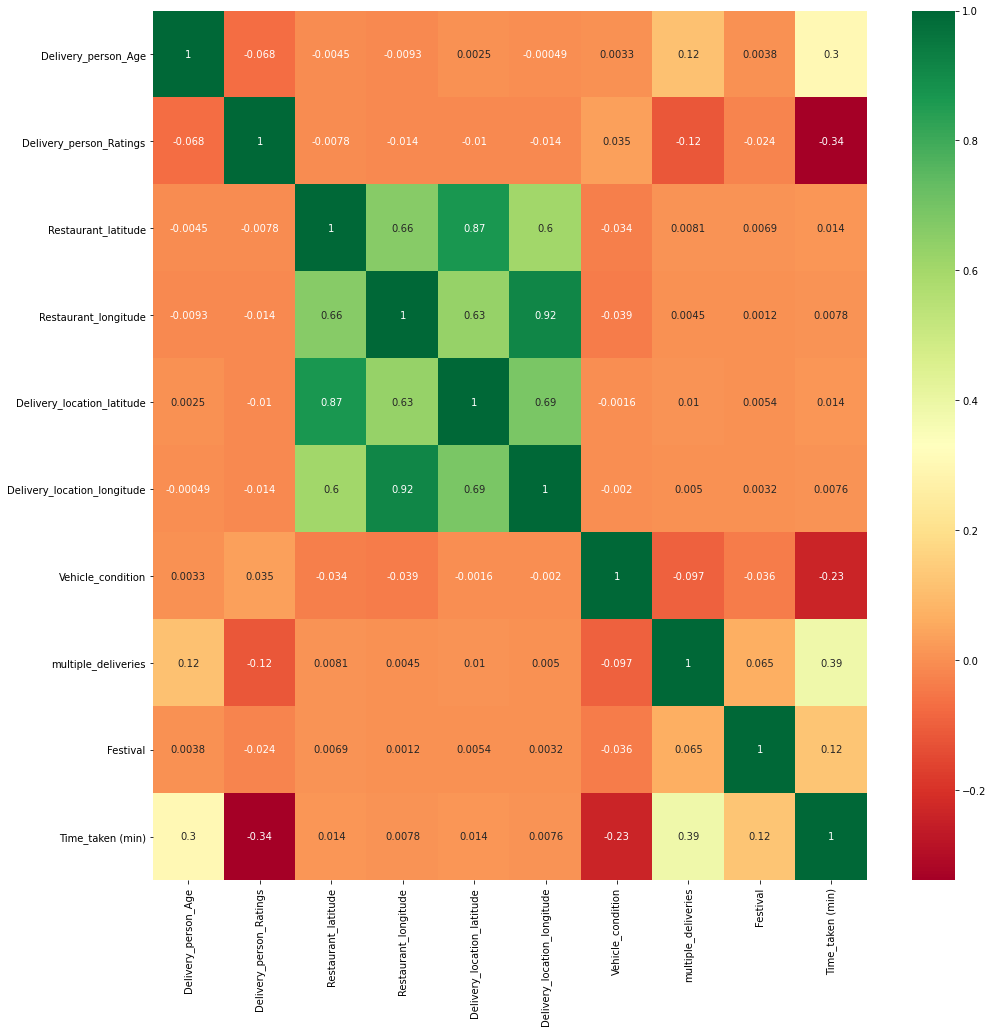

In [40]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
# Relationship of Features w.r.t Target Variable
X.corr()['Time_taken (min)'].sort_values()

Delivery_person_Ratings       -0.338790
Vehicle_condition             -0.234398
Delivery_location_longitude    0.007625
Restaurant_longitude           0.007821
Restaurant_latitude            0.013981
Delivery_location_latitude     0.014243
Festival                       0.122565
Delivery_person_Age            0.299474
multiple_deliveries            0.387051
Time_taken (min)               1.000000
Name: Time_taken (min), dtype: float64

### Multicollinearity Check

<B>1.) The Independant Features(X) should not be Highly Co-rrelated btw each other as it weakens the statistical power of Regression Model

2.) Dropping those Features which has Correlation>0.4</B>

In [42]:
multicolinearity_check = X.corr()
X.corr()>0.4

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min)
Delivery_person_Age,True,False,False,False,False,False,False,False,False,False
Delivery_person_Ratings,False,True,False,False,False,False,False,False,False,False
Restaurant_latitude,False,False,True,True,True,True,False,False,False,False
Restaurant_longitude,False,False,True,True,True,True,False,False,False,False
Delivery_location_latitude,False,False,True,True,True,True,False,False,False,False
Delivery_location_longitude,False,False,True,True,True,True,False,False,False,False
Vehicle_condition,False,False,False,False,False,False,True,False,False,False
multiple_deliveries,False,False,False,False,False,False,False,True,False,False
Festival,False,False,False,False,False,False,False,False,True,False
Time_taken (min),False,False,False,False,False,False,False,False,False,True


In [ ]:
#Analysis

### Uni-Variate Analysis of the Data

In [62]:
X['Weather conditions'].value_counts().sort_values(ascending=False)

Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weather conditions, dtype: int64

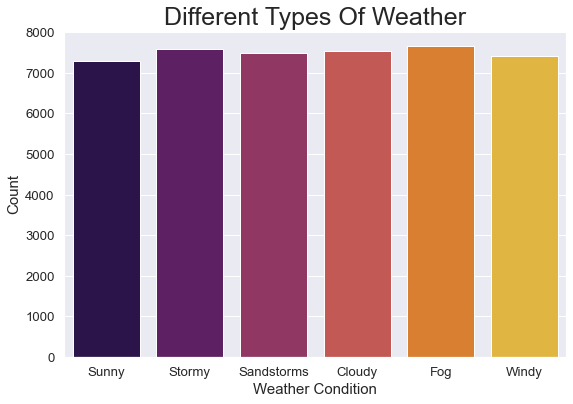

In [59]:
fig_dims = (9, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(X['Weather conditions'], palette = 'inferno',ax=ax)
plt.title('Different Types Of Weather', fontsize = 25)
plt.xlabel('Weather Condition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [63]:
data_train['Festival'].value_counts()

No     44469
Yes      896
Name: Festival, dtype: int64

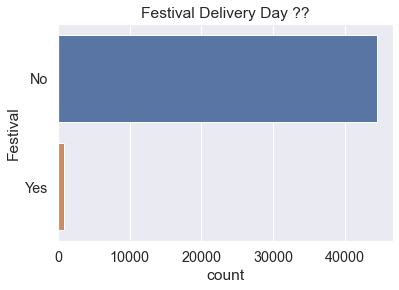

In [68]:
sns.set(font_scale=1.3)
sns.countplot(y='Festival', data=data_train, order=data_train.Festival.value_counts().index).set_title('Festival Delivery Day ??')
plt.show()

In [75]:
X['Road_traffic_density'].value_counts().sort_values(ascending=False)

Low       15477
Jam       14143
Medium    10947
High       4425
Name: Road_traffic_density, dtype: int64

In [76]:
X['Type_of_vehicle'].value_counts().sort_values(ascending=False)

motorcycle          26435
scooter             15276
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64

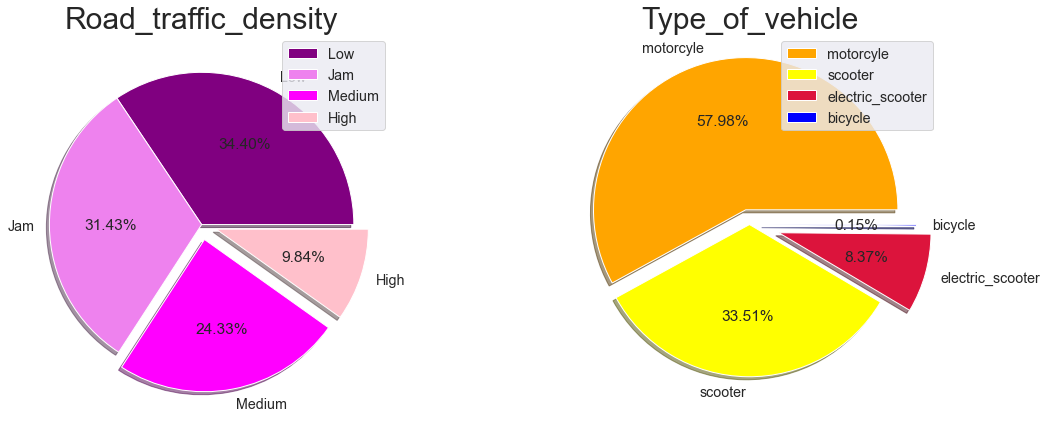

In [89]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [15477, 14143, 10947,4425]
colors = ['purple','violet', 'magenta', 'pink']
labels = "Low", "Jam", "Medium","High"
explode = [0, 0, 0.1,0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Road_traffic_density', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [26435, 15276, 3814, 68]
colors = ['orange', 'yellow','crimson', 'blue']
labels = "motorcyle", "scooter","electric_scooter","bicycle"
explode = [0.1,0,0.2,0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels,explode=explode, shadow = True, autopct = '%.2f%%')
plt.title('Type_of_vehicle', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [90]:
X['Type_of_order'].value_counts().sort_values(ascending=False)

Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: Type_of_order, dtype: int64

In [92]:
X['Type_of_order'].value_counts().sort_values(ascending=False)

Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: Type_of_order, dtype: int64

In [91]:
X['City'].value_counts().sort_values(ascending=False)

Metropolitian    34093
Urban            10136
Semi-Urban         164
Name: City, dtype: int64

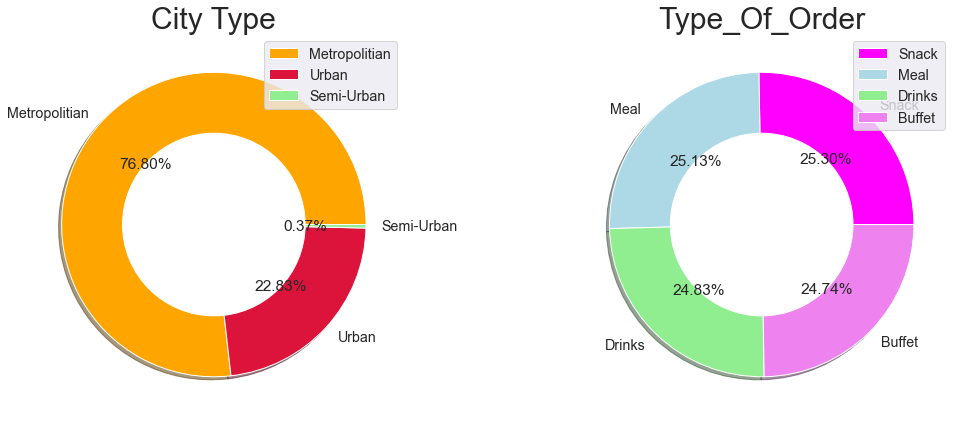

In [94]:
#creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [34093, 10136, 164]
colors = ['orange', 'crimson', 'lightgreen']
labels = "Metropolitian", "Urban","Semi-Urban"
explode = [0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('City Type', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [11533,11458,11322,11280]
colors = ['magenta', 'lightblue', 'lightgreen', 'violet']
labels = "Snack", "Meal", "Drinks", "Buffet"
explode = [0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Type_Of_Order', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

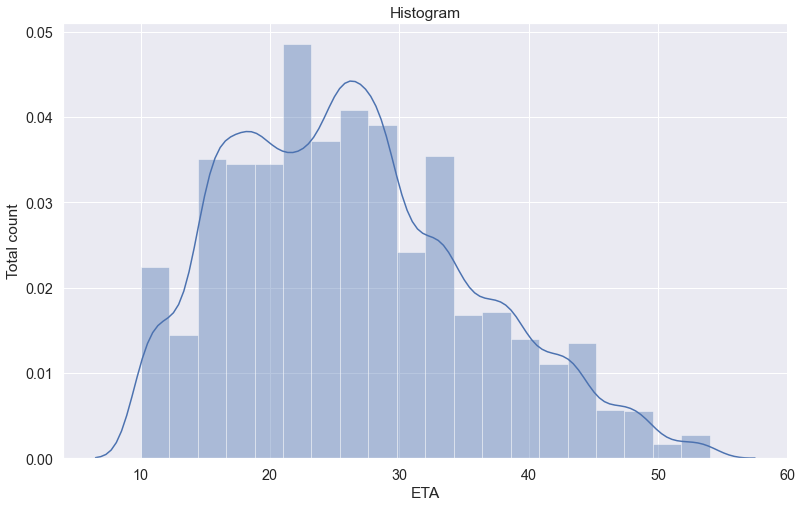

In [257]:
fig_dims = (13, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(data_train['Time_taken (min)'],bins=20,ax=ax)
plt.xlabel("ETA")
plt.ylabel("Total count")
plt.title("Histogram")
plt.show()

### Bi-Variate Analysis of the Data

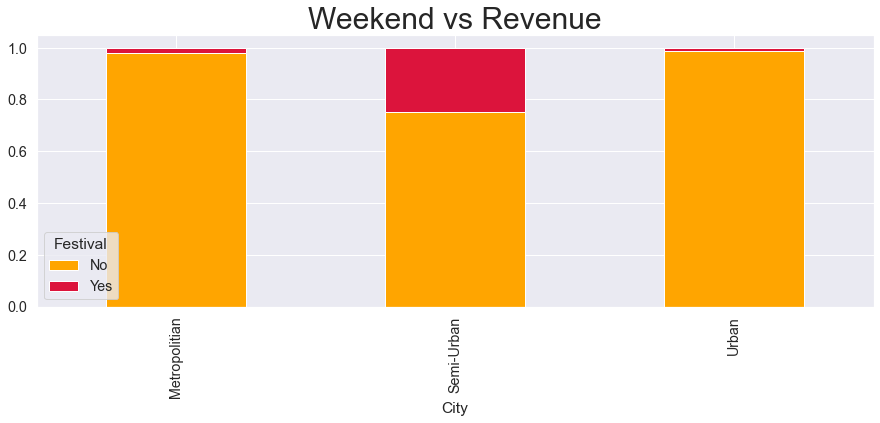

In [107]:
# VisitorType vs Revenue

df = pd.crosstab(X['City'], data_train['Festival'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()


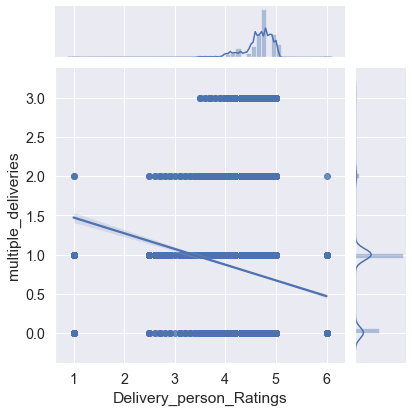

In [272]:
sns.jointplot(x='Delivery_person_Ratings',y='multiple_deliveries',data=data_train,kind='reg')
#g = sns.jointplot(ecom.Male_ninetyone,ecom['Female_ninetyone'], kind="hex", height=7, space=0)
plt.show()

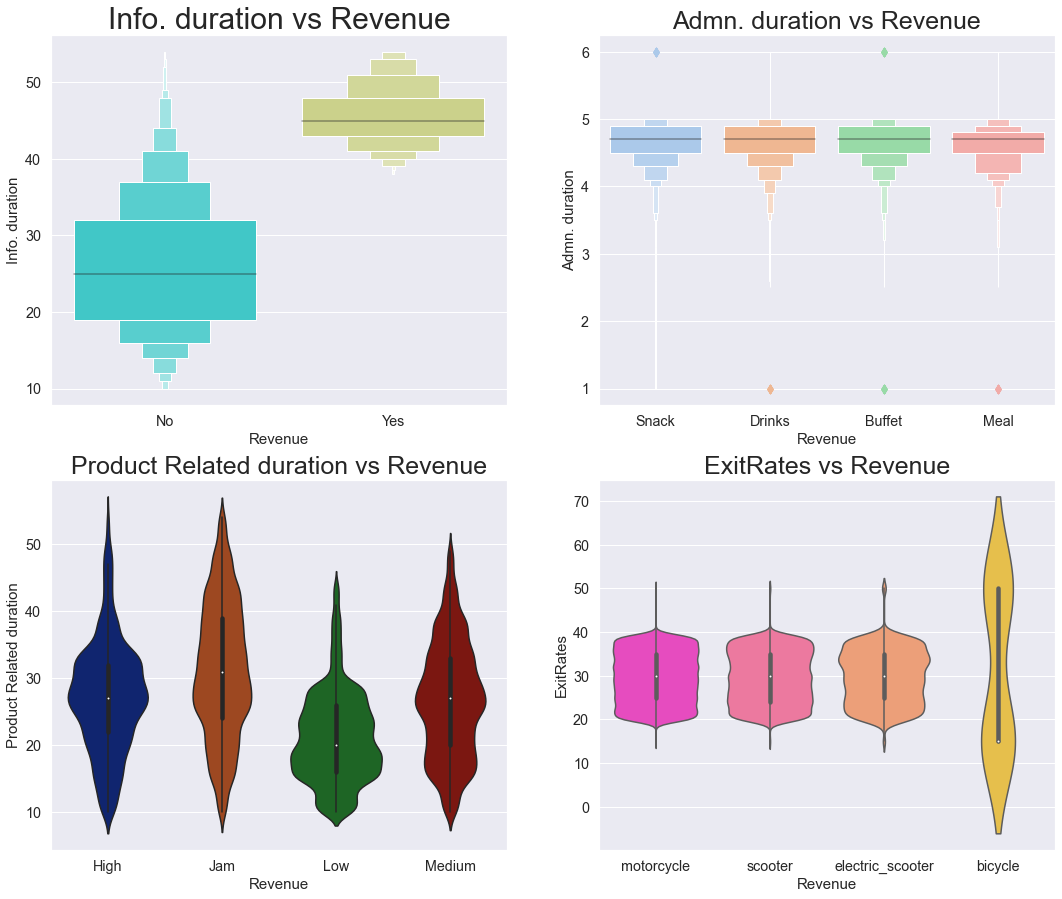

In [118]:
# product related duration vs revenue
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)# divide 4 plots into 2 rows & 2 columns and 1 for in 1st row and 1st column
sns.boxenplot(data_train['Festival'], data_train['Time_taken (min)'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Info. duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data_train['Type_of_order'], data_train['Delivery_person_Ratings'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 25)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Admn. duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.violinplot(data_train['Road_traffic_density'], data_train['Time_taken (min)'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 25)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Product Related duration', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.violinplot(data_train['Type_of_vehicle'], data_train['Delivery_person_Age'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 25)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)





plt.show()

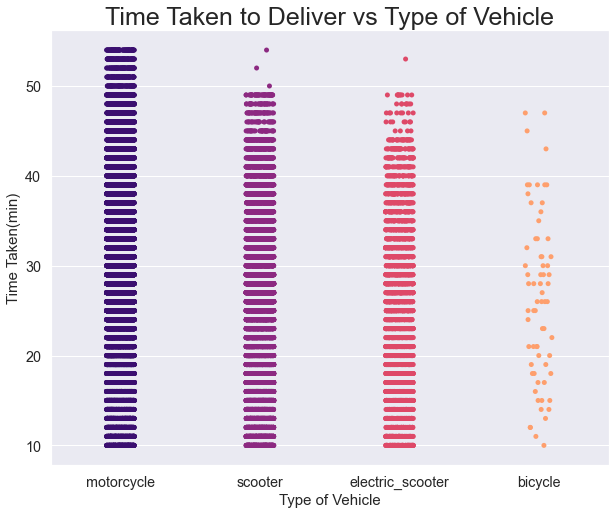

In [112]:
# bounce rates vs revenue
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(data_train['Type_of_vehicle'], data_train['Time_taken (min)'], palette = 'magma',ax=ax)
plt.title('Time Taken to Deliver vs Type of Vehicle', fontsize = 25)
plt.xlabel('Type of Vehicle', fontsize = 15)
plt.ylabel('Time Taken(min)', fontsize = 15)

plt.show()

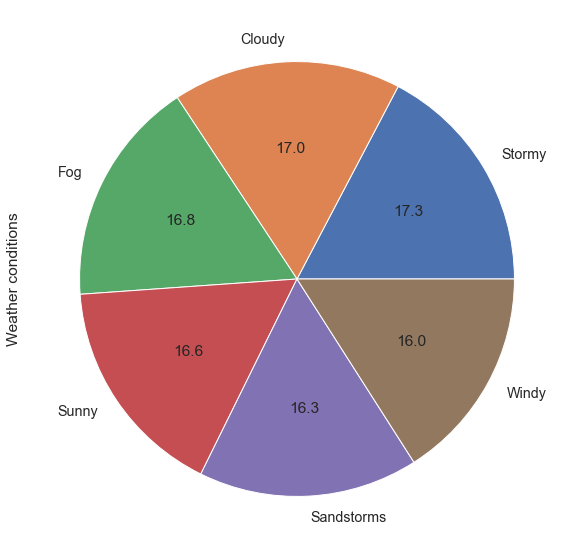

In [125]:
intermediate = data_train[['Weather conditions','Road_traffic_density','Vehicle_condition','Type_of_vehicle']][data_train['Type_of_order']=='Drinks']
inter = intermediate['Weather conditions'].value_counts()
inter.plot.pie(y=inter.values, figsize=(10,10), autopct='%.1f')
plt.show()

### Multi-Variate Analysis

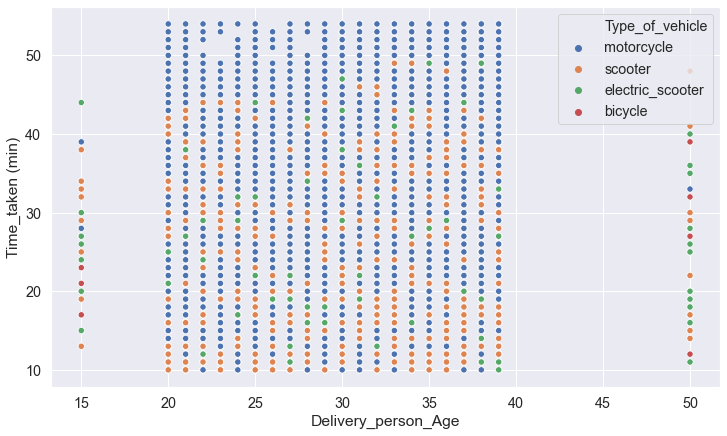

In [274]:
# Compairing Each Delivery Person Age w.r.t to Time Taken To deliver(min) w.r.t Type of Vehicle they Carry
plt.figure(figsize=(12,7))
sns.scatterplot(x='Delivery_person_Age', y='Time_taken (min)', hue='Type_of_vehicle', data=data_train, s=40)
plt.show()

### Feature Selection:
<B>Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data</B>

In [200]:
# Dropping these Columns as K Best Features works only on Numerical Data with Int & Float Type
x=x.drop('Time_Orderd', axis=1)
x=x.drop('Order_Date', axis=1)
x=x.drop('Time_Order_picked', axis=1)
x=x.drop('Weather conditions', axis=1)
x=x.drop('Road_traffic_density', axis=1)
x=x.drop('Type_of_order', axis=1)
x=x.drop('Type_of_vehicle', axis=1)

In [184]:
#Checking if any Missing values persists
missing_percentage = x.isnull().sum()/100
print(missing_percentage)

Delivery_person_Age            18.54
Delivery_person_Ratings        19.08
Restaurant_latitude             0.00
Restaurant_longitude            0.00
Delivery_location_latitude      0.00
Delivery_location_longitude     0.00
Vehicle_condition               0.00
multiple_deliveries             9.93
Festival                        0.00
dtype: float64


In [204]:
#Filling the Nan values with mean 
x['Delivery_person_Age'] = x['Delivery_person_Age'].fillna(x['Delivery_person_Age'].mean())
x['Delivery_person_Ratings'] = x['Delivery_person_Ratings'].fillna(x['Delivery_person_Ratings'].mean())
x['multiple_deliveries'] =x['multiple_deliveries'].fillna(x['multiple_deliveries'].mean())

In [205]:
#Scaling the Features within 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
x= sc.fit_transform(x)

In [190]:
x

array([[0.62857143, 0.78      , 0.86785735, ..., 0.66666667, 0.        ,
        0.        ],
       [0.54285714, 0.7       , 0.70881386, ..., 0.66666667, 0.33333333,
        0.        ],
       [0.22857143, 0.68      , 0.70883365, ..., 0.        , 0.33333333,
        0.        ],
       ...,
       [0.42857143, 0.78      , 0.71058277, ..., 0.33333333, 0.        ,
        0.        ],
       [0.14285714, 0.74      , 0.67789669, ..., 0.        , 0.33333333,
        0.        ],
       [0.22857143, 0.78      , 0.87766021, ..., 0.66666667, 0.33333333,
        0.        ]])

#### 1. Using SelectKBest to Select those Features which has K Highest Score

In [206]:
# Importing Essential Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Creating bestfeatures object and scoring by chi2
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(x,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [207]:
featureScores

,Specs,Score
0,Delivery_person_Age,300.528635
1,Delivery_person_Ratings,50.614596
2,Restaurant_latitude,0.977225
3,Restaurant_longitude,0.781291
4,Delivery_location_latitude,3.845402
5,Delivery_location_longitude,2.582501
6,Vehicle_condition,796.998796
7,multiple_deliveries,1006.217534
8,Festival,3740.277739


In [210]:
print(featureScores.nlargest(9,'Score'))  # Displaying 9 best features

                         Specs        Score
8                     Festival  3740.277739
7          multiple_deliveries  1006.217534
6            Vehicle_condition   796.998796
0          Delivery_person_Age   300.528635
1      Delivery_person_Ratings    50.614596
4   Delivery_location_latitude     3.845402
5  Delivery_location_longitude     2.582501
2          Restaurant_latitude     0.977225
3         Restaurant_longitude     0.781291


### Analysis

<B>1.) We get Highest K Score for Festival and Lowest for Restaurant_latitude & Restaurant_longitude</B>
           
<B>         2.) Hence, we Must Drop last the columns with least K Score for minimum mse & Higher R2 Score</B>

<B>3.) We will Drop Restaurant_latitude & Restaurant_longitude before creating our Regressor Model </B>

#### 2. PCA - Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning

In [215]:
# Dropping the Date-Time Columns

X=X.drop('Time_Orderd', axis=1)
X=X.drop('Order_Date', axis=1)
X=X.drop('Time_Order_picked', axis=1)

In [217]:
# Filling the Nan Values with Mean 

X['Delivery_person_Age'] = X['Delivery_person_Age'].fillna(X['Delivery_person_Age'].mean())
X['Delivery_person_Ratings'] = X['Delivery_person_Ratings'].fillna(X['Delivery_person_Ratings'].mean())
X['multiple_deliveries'] = X['multiple_deliveries'].fillna(X['multiple_deliveries'].mean())

In [218]:
# Filling the Nan Values with Mode

X['Weather conditions']=X['Weather conditions'].fillna(X['Weather conditions'].mode()[0])
X['Road_traffic_density']=X['Road_traffic_density'].fillna(X['Road_traffic_density'].mode()[0])
X['Festival']=X['Festival'].fillna(X['Festival'].mode()[0])
X['City']=X['City'].fillna(X['City'].mode()[0])

In [220]:
# Encoding the Festival Column into 0,1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,12] = le.fit_transform(X.iloc[:, 12])

In [221]:
# Encoding the Multi Class Column by One Hot Encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6,7,9,10,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [242]:
# Scaling the Features within 0 to 1

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
X= sc.fit_transform(X)

In [223]:
# Importing PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [225]:
pca.fit(X)

PCA(n_components=2)

In [226]:
x_pca=pca.transform(X)

In [227]:
X.shape

(45593, 30)

In [228]:
# Reduced the Dimensions to 2
x_pca.shape

(45593, 2)

In [229]:
x_pca

array([[-0.29503792,  0.91896261],
       [ 0.85182383, -0.76948792],
       [-0.43721181,  1.37219269],
       ...,
       [ 0.83453014,  0.08654478],
       [-0.64841566, -0.22581468],
       [ 0.8830484 , -0.45942411]])

Text(0, 0.5, 'First Principal Component')

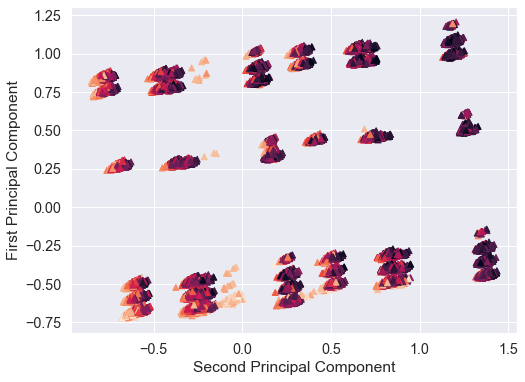

In [280]:
# Visualization Plot for PCA 1, PCA 2 w.r.t the Target Variable(Time Taken(m))
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,0],c=Y,marker='^')
plt.xlabel("Second Principal Component")
plt.ylabel("First Principal Component")

#### Please Check the Next Notebook ''Model Building & Train_Predict the Time Taken (Min)'' for Model Bulding & Predicting the Y_test & MSE !! 